# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

import warnings
warnings.filterwarnings ('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Vivekfreak/Datasets/main/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.drop(columns=['State'], inplace = True)

In [6]:
df.shape

(50, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


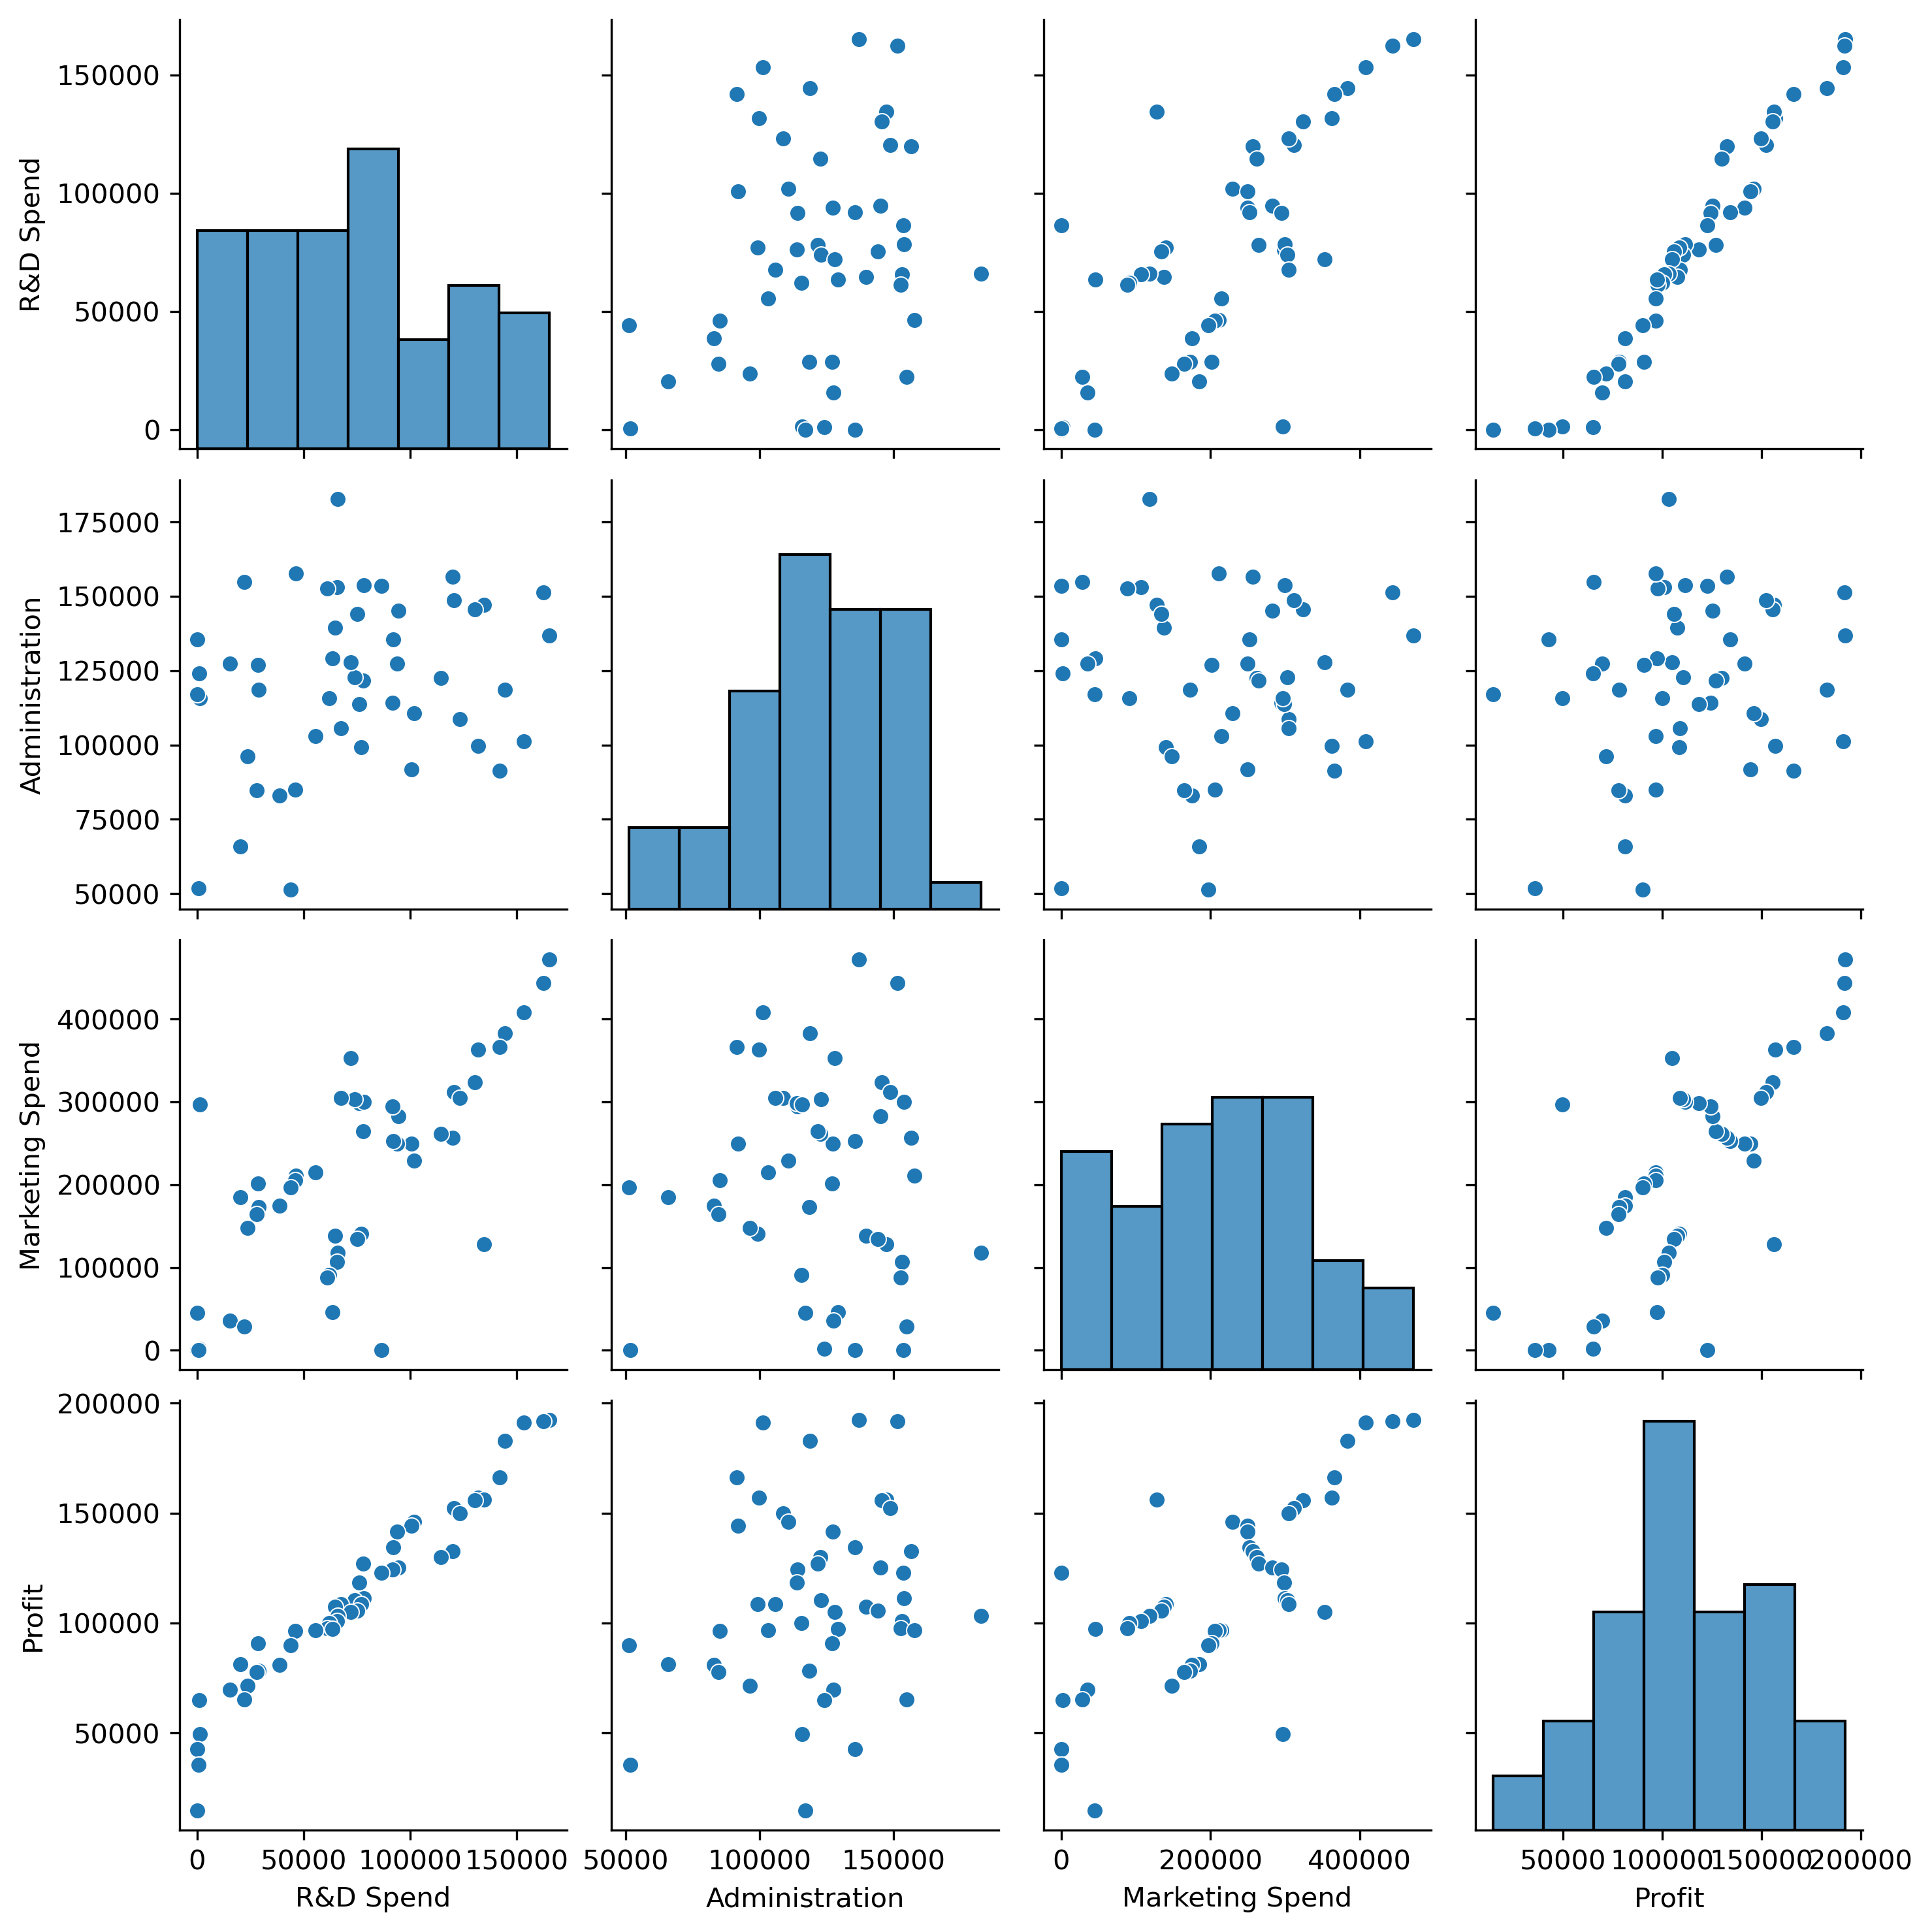

In [12]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.pairplot(df)

In [13]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


array([[<AxesSubplot:xlabel='R&D Spend', ylabel='R&D Spend'>,
        <AxesSubplot:xlabel='Administration', ylabel='R&D Spend'>,
        <AxesSubplot:xlabel='Marketing Spend', ylabel='R&D Spend'>,
        <AxesSubplot:xlabel='Profit', ylabel='R&D Spend'>],
       [<AxesSubplot:xlabel='R&D Spend', ylabel='Administration'>,
        <AxesSubplot:xlabel='Administration', ylabel='Administration'>,
        <AxesSubplot:xlabel='Marketing Spend', ylabel='Administration'>,
        <AxesSubplot:xlabel='Profit', ylabel='Administration'>],
       [<AxesSubplot:xlabel='R&D Spend', ylabel='Marketing Spend'>,
        <AxesSubplot:xlabel='Administration', ylabel='Marketing Spend'>,
        <AxesSubplot:xlabel='Marketing Spend', ylabel='Marketing Spend'>,
        <AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>],
       [<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>,
        <AxesSubplot:xlabel='Administration', ylabel='Profit'>,
        <AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'

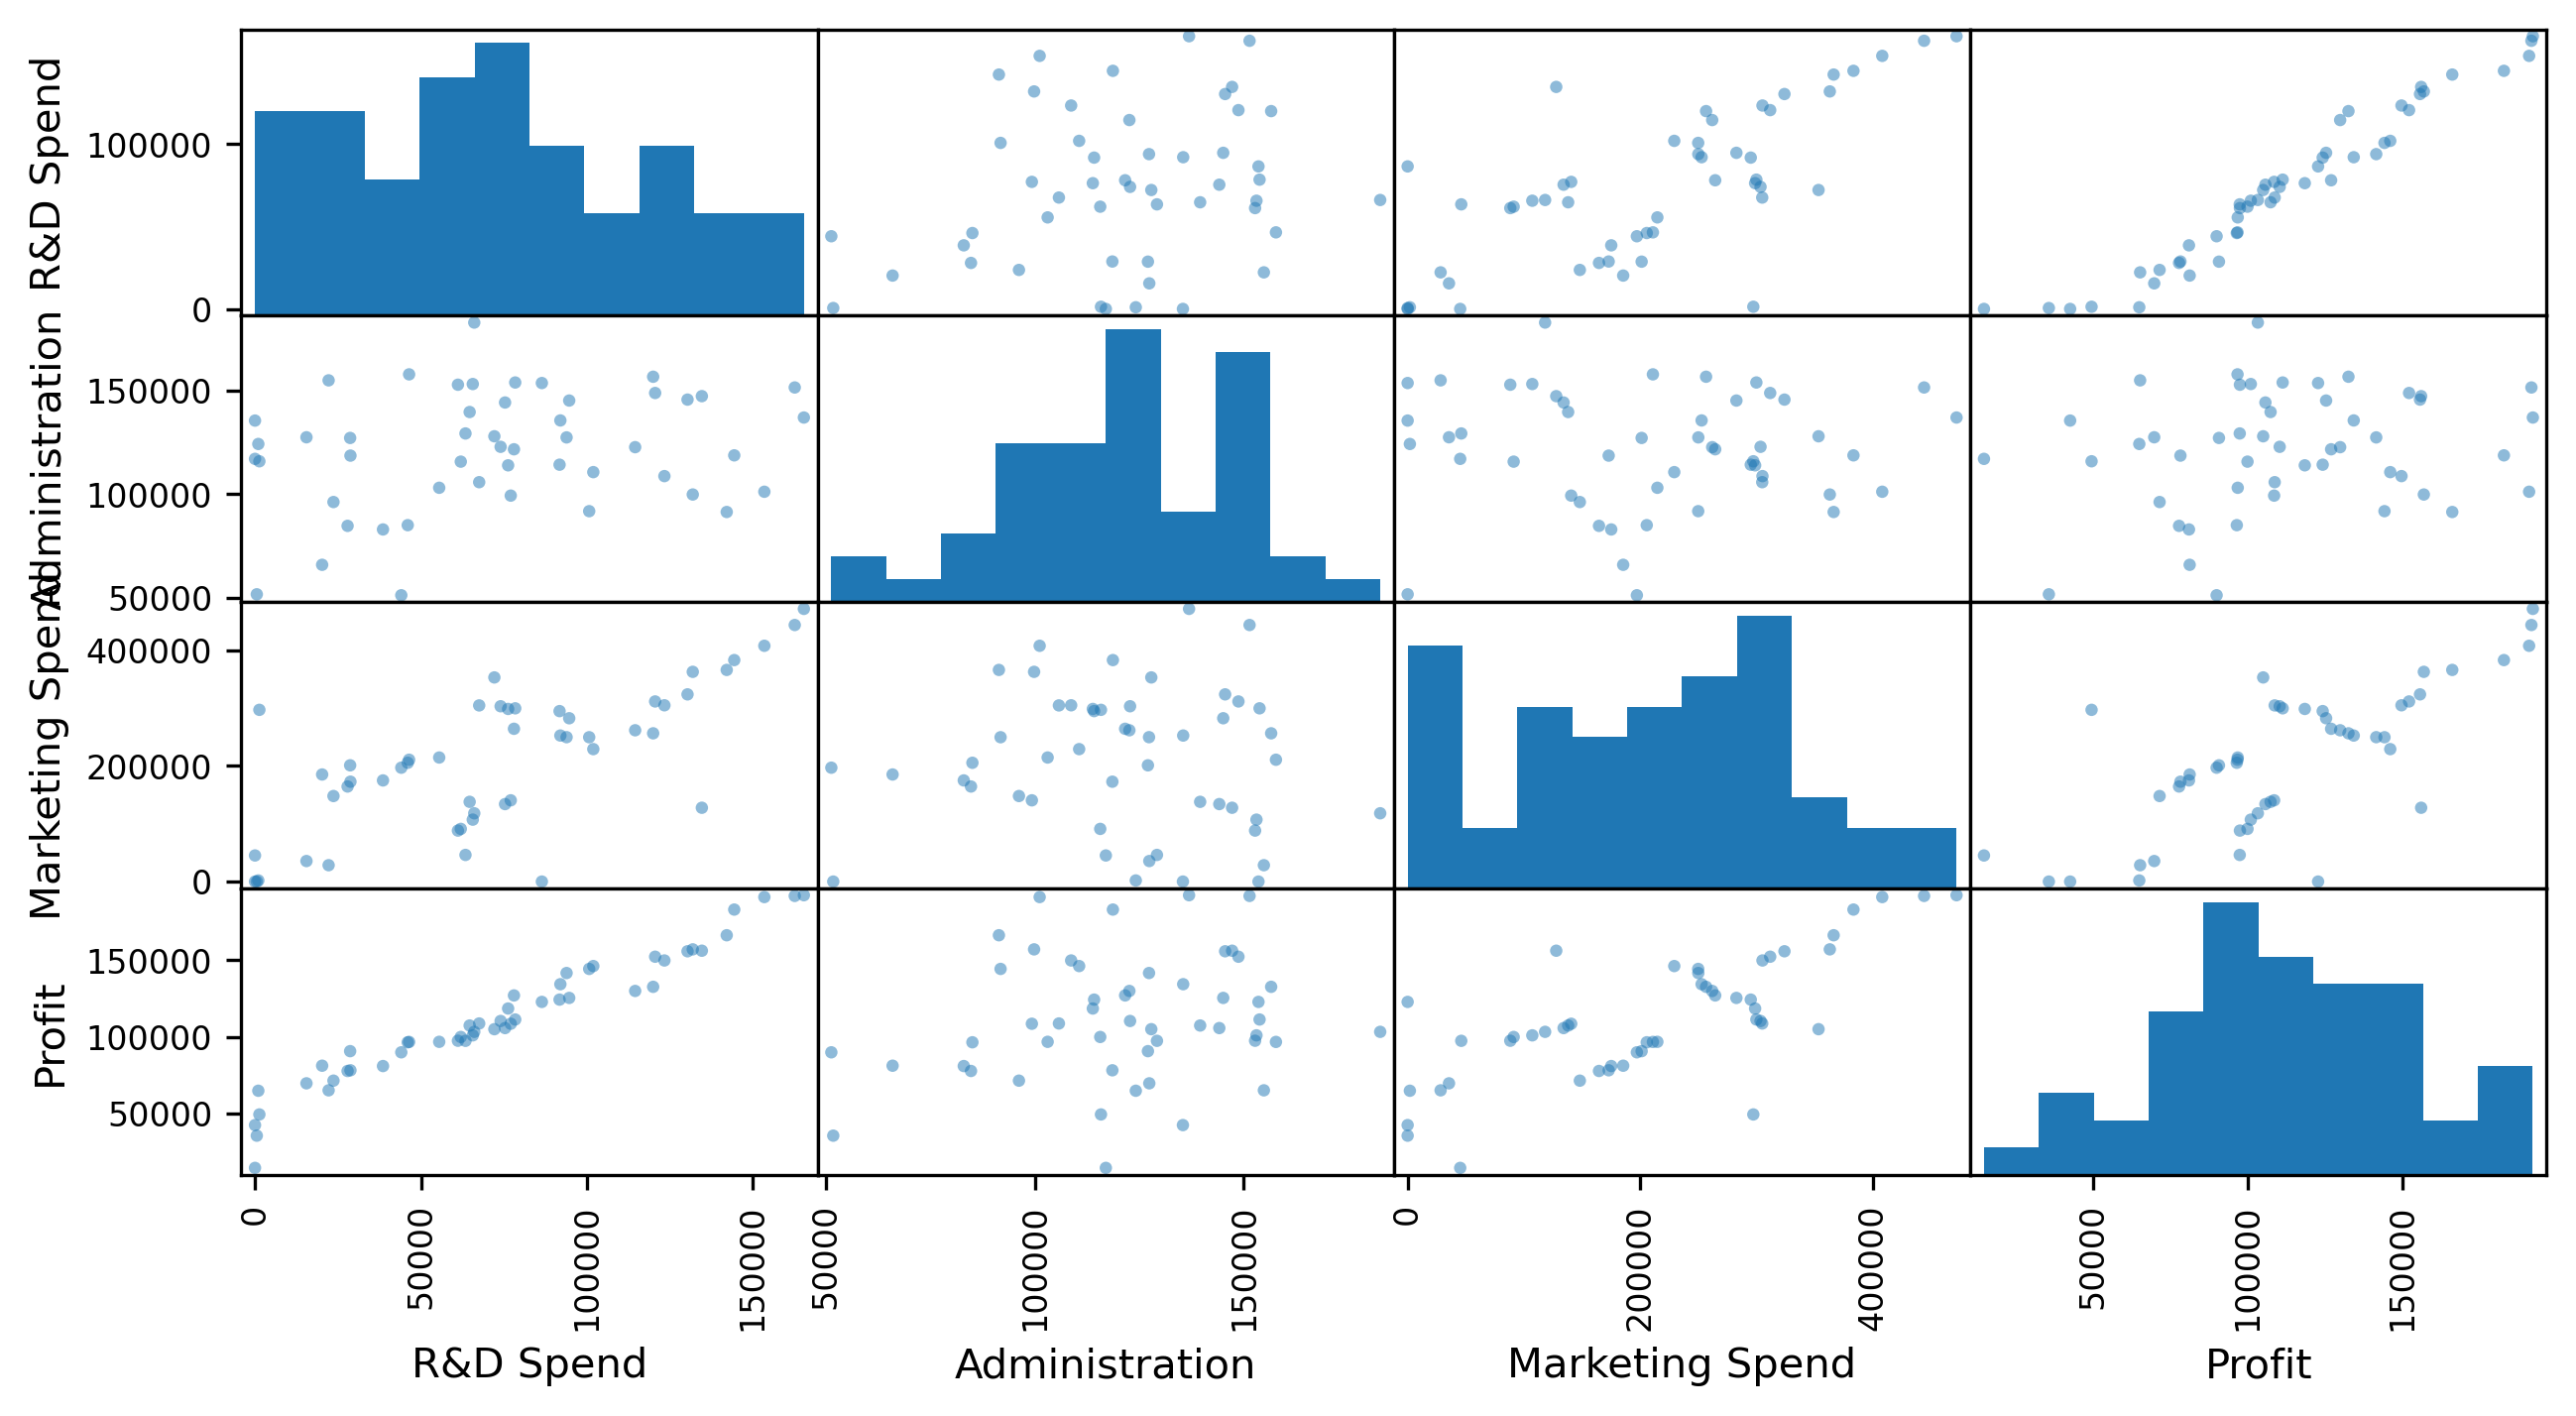

In [14]:
pd.plotting.scatter_matrix(df)

<AxesSubplot:>

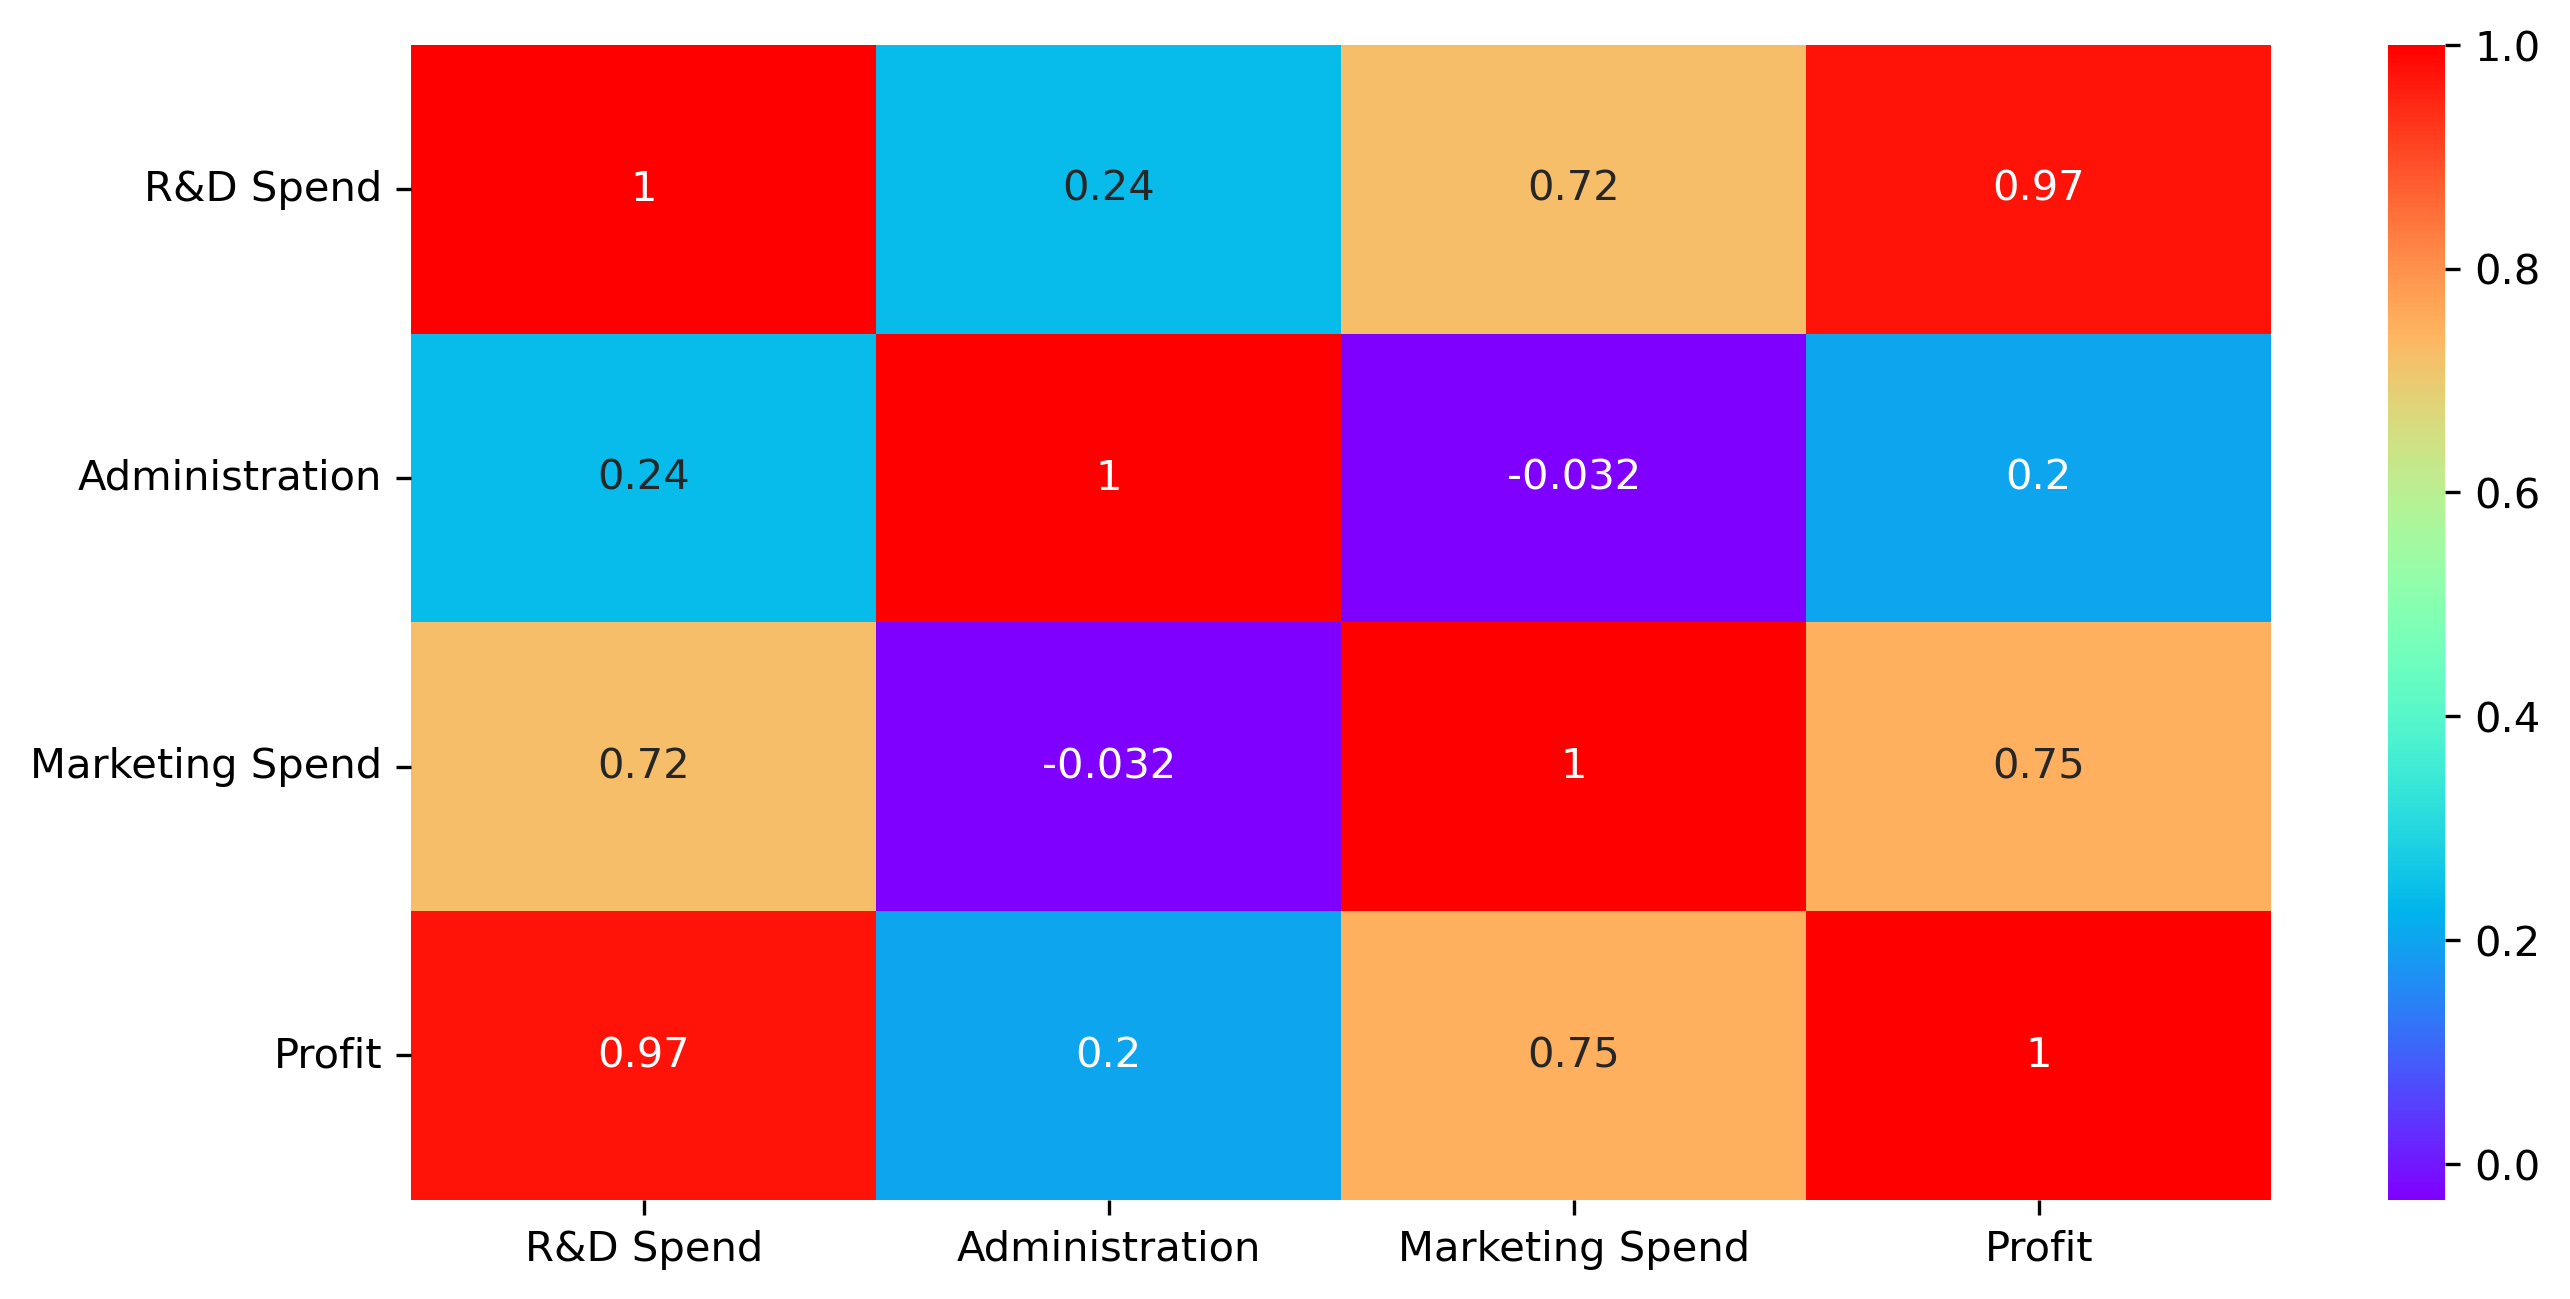

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

In [16]:
df.rename(columns={'Marketing Spend':'marketing_spend','R&D Spend':'rnd_spend'}, inplace=True)

In [17]:
df.head(1)

,rnd_spend,Administration,marketing_spend,Profit
0,165349.2,136897.8,471784.1,192261.83


In [18]:
model=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=df).fit()

In [20]:
model.params

Intercept          50122.192990
rnd_spend              0.805715
Administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        21:54:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_admin=smf.ols('Profit~Administration',data=df).fit()

In [23]:
model_admin.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [24]:
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 21 Feb 2023   Prob (F-statistic):              0.162
Time:                        21:55:41   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model_mktg=smf.ols('Profit~marketing_spend',data=df).fit()

In [26]:
model_mktg.params

Intercept          60003.548816
marketing_spend        0.246459
dtype: float64

In [27]:
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 21 Feb 2023   Prob (F-statistic):              0.162
Time:                        21:56:28   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_mktg_admin=smf.ols('Profit~Administration+marketing_spend',data=df).fit()

In [29]:
model_mktg_admin.params

Intercept          20224.429059
Administration         0.323673
marketing_spend        0.248844
dtype: float64

In [30]:
model_mktg_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.50e-10
Time:                        21:57:57   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df.columns

Index(['rnd_spend', 'Administration', 'marketing_spend', 'Profit'], dtype='object')

In [35]:
r_rnd=smf.ols('rnd_spend~Administration+marketing_spend',data=df).fit().rsquared
vif_rnd=1/(1-r_rnd)

r_admin=smf.ols('Administration~rnd_spend+marketing_spend',data=df).fit().rsquared
vif_admin=1/(1-r_admin)

r_mktg=smf.ols('marketing_spend~rnd_spend+Administration',data=df).fit().rsquared
vif_mktg=1/(1-r_mktg)

d1={'Variables':['rnd_spend','Administration','marketing_spend'],
   'VIF':[vif_rnd,vif_admin,vif_mktg]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,VIF
0,rnd_spend,2.468903
1,Administration,1.175091
2,marketing_spend,2.326773


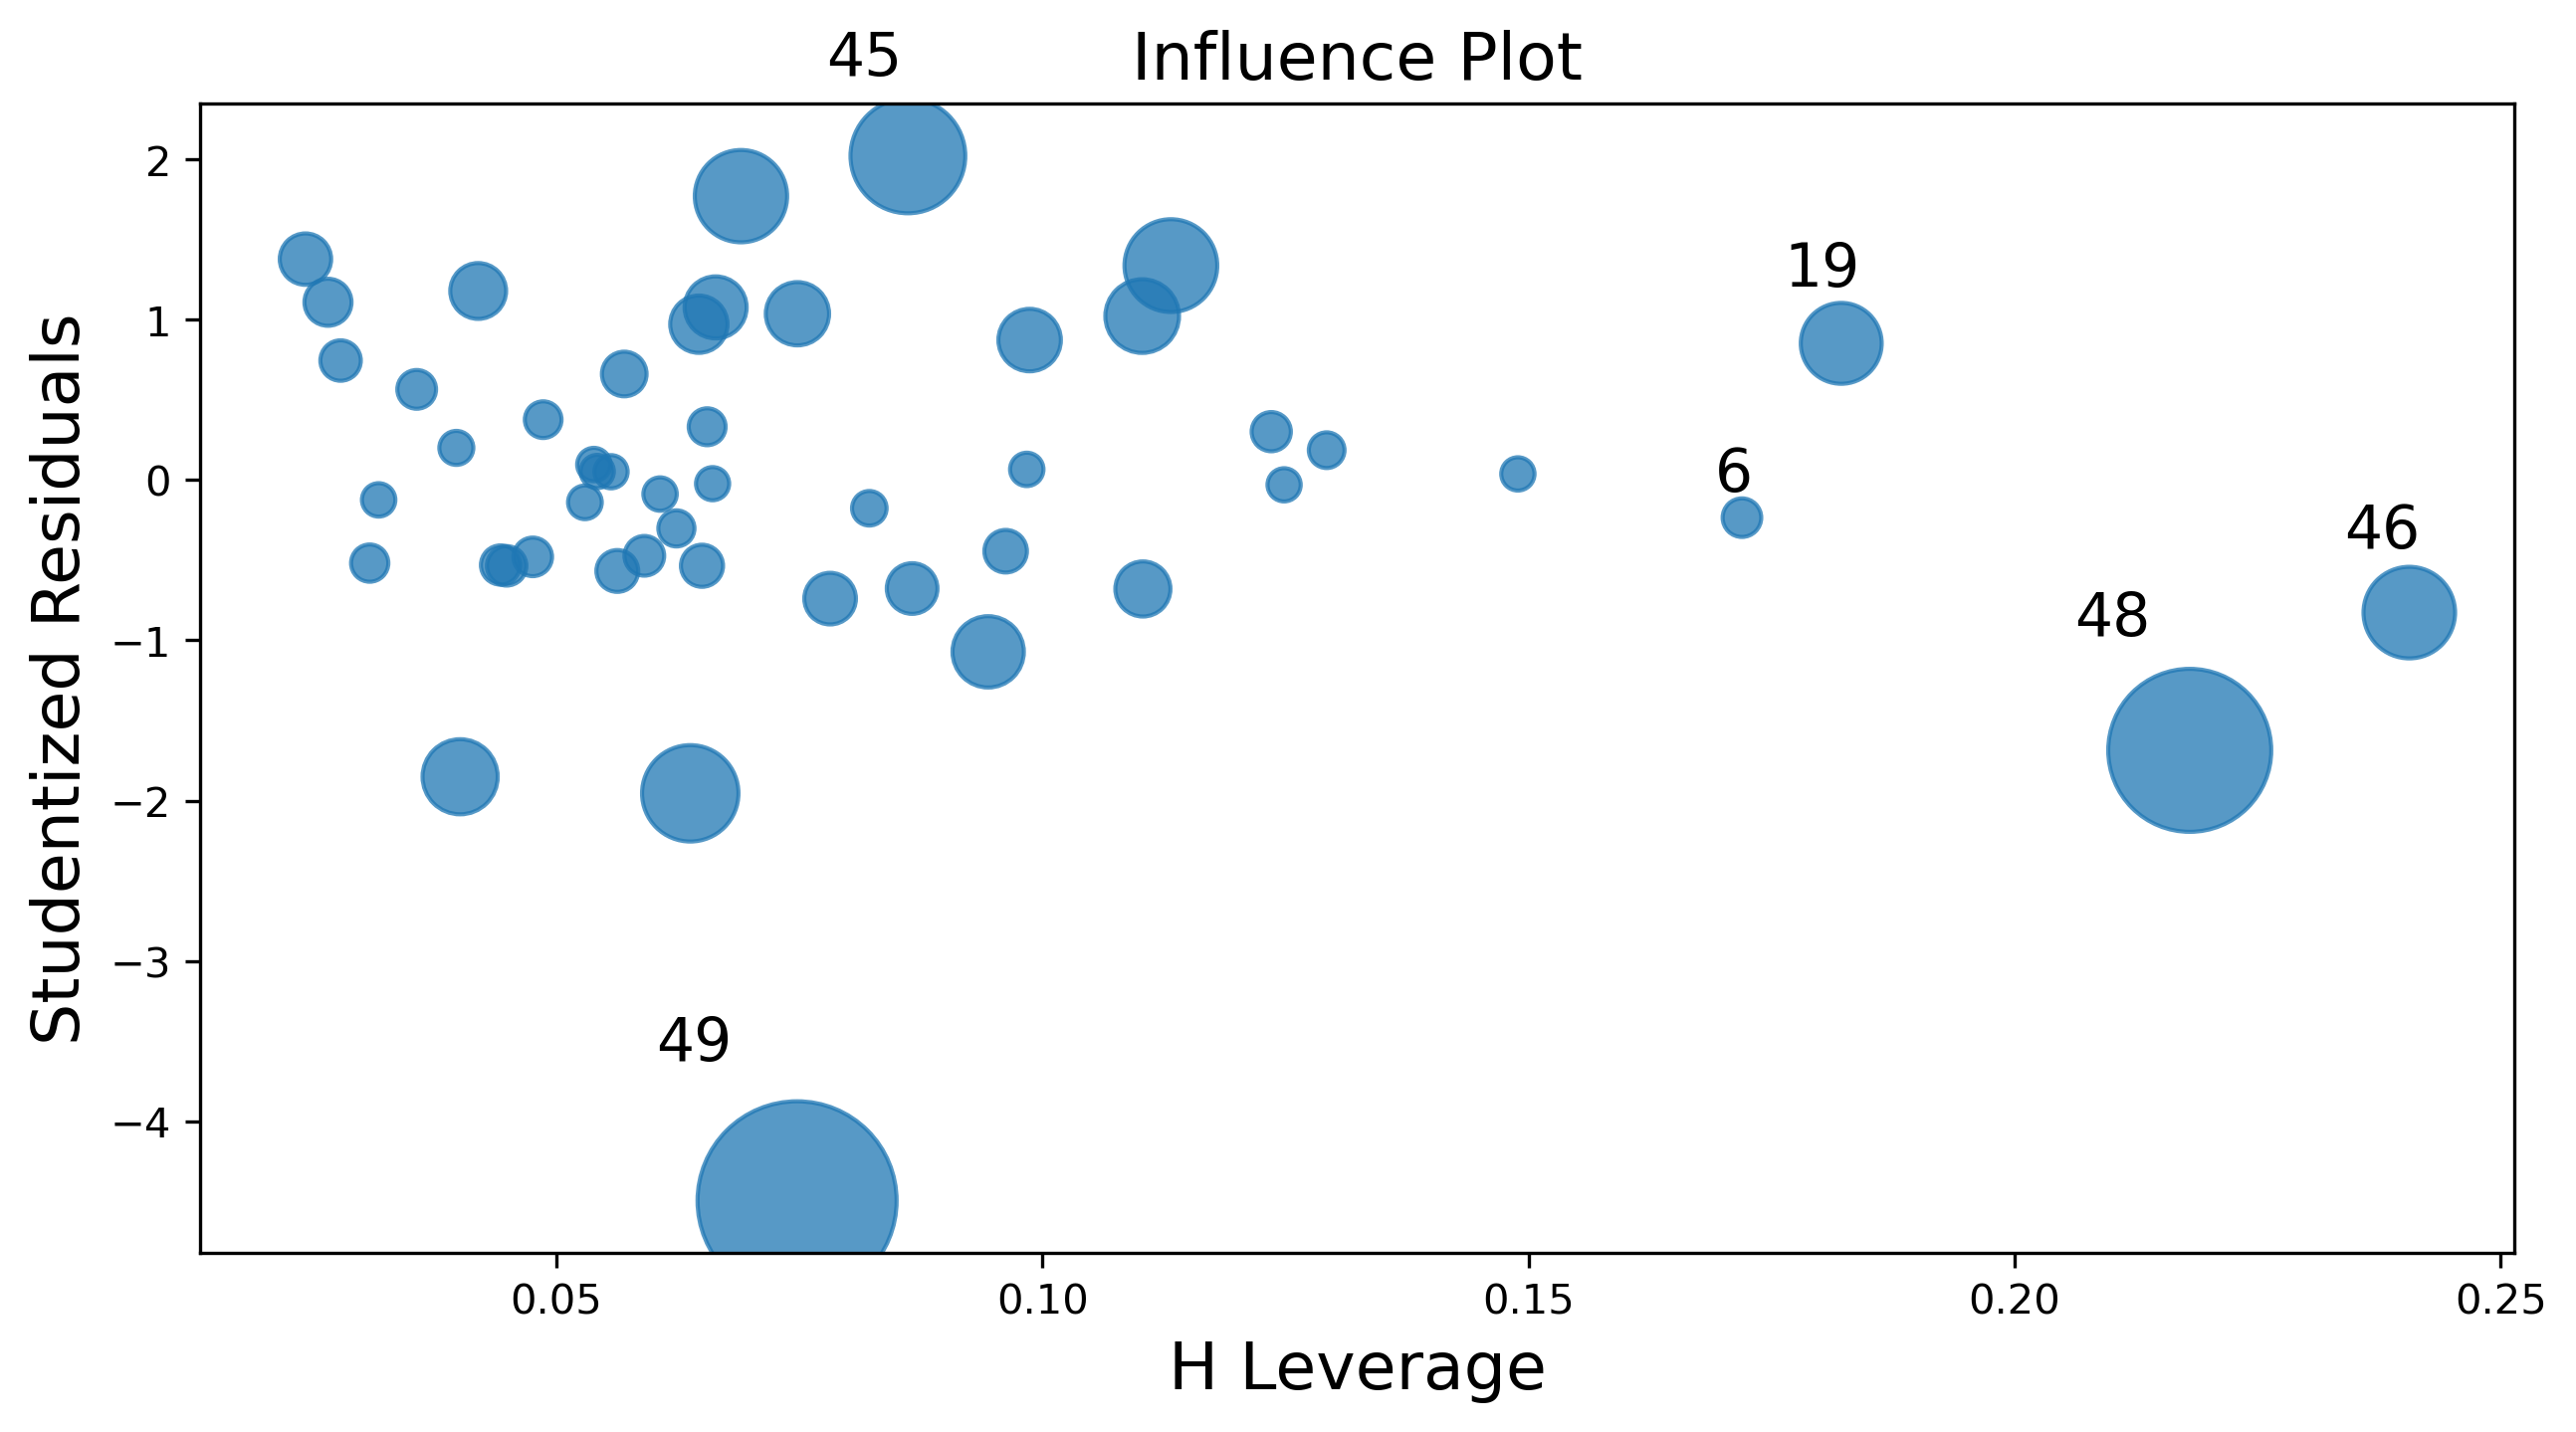

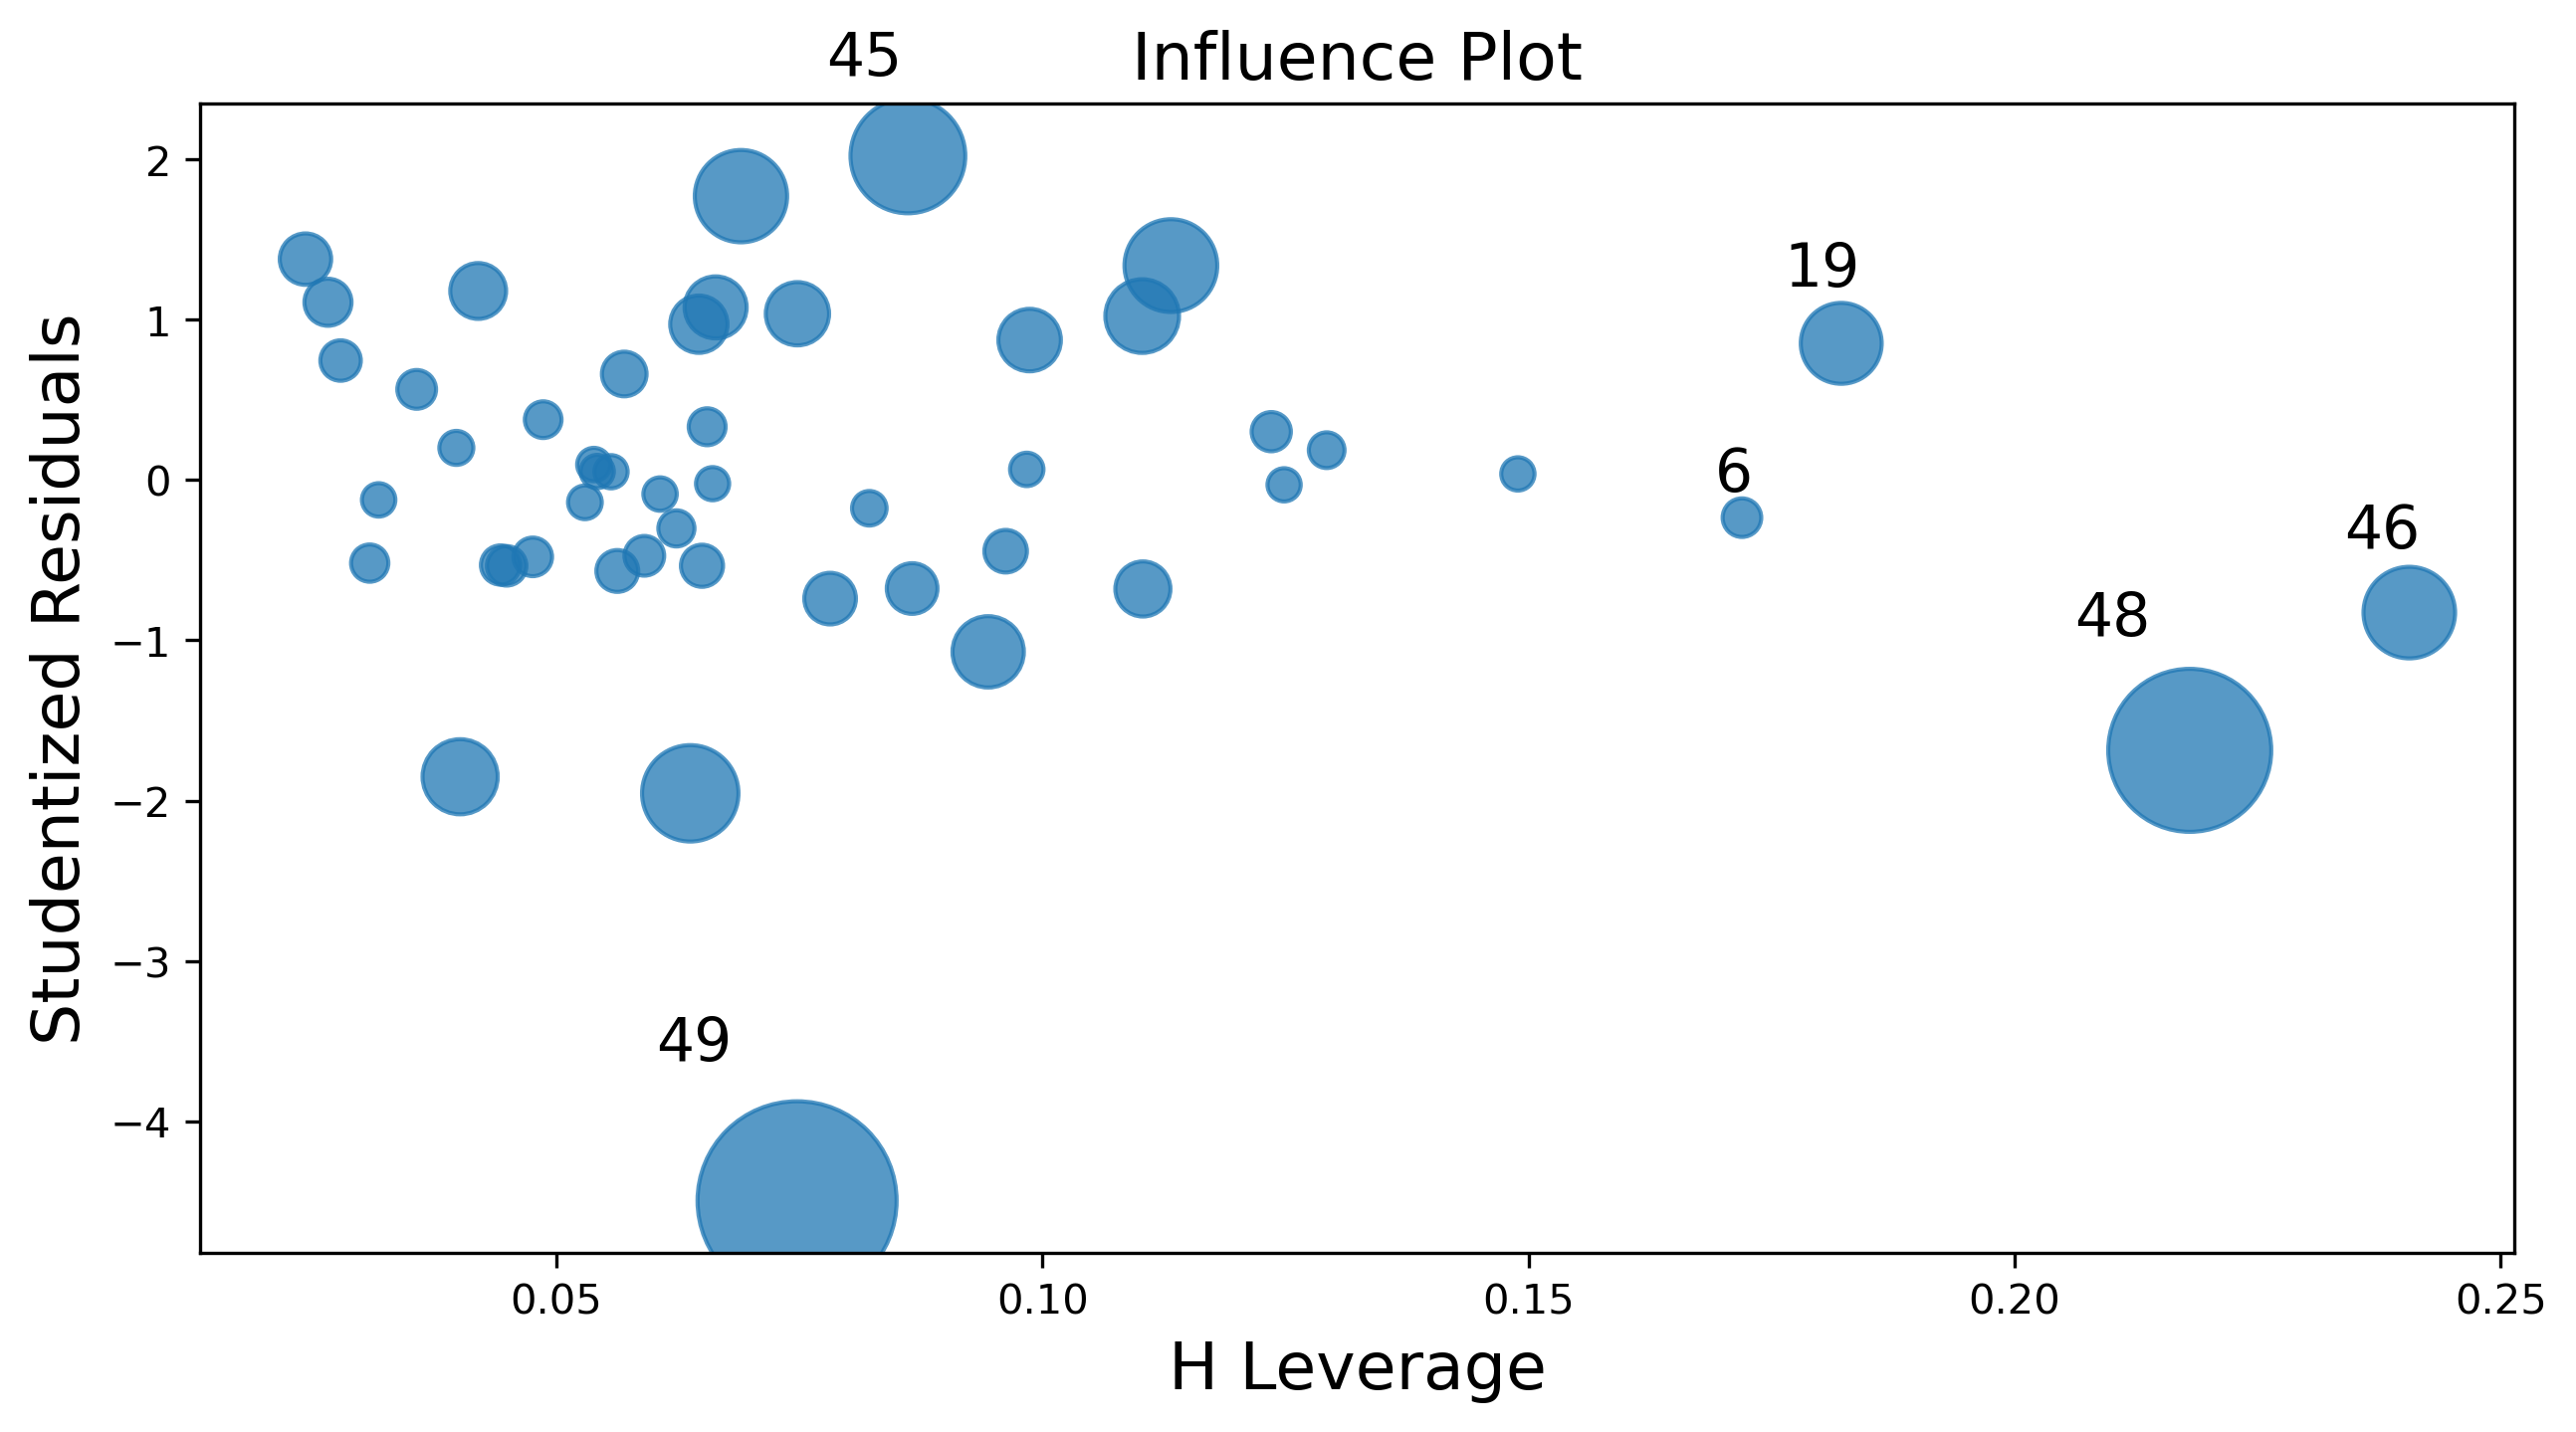

In [38]:
import statsmodels.api as sm
sm.graphics.influence_plot(model)

In [39]:
df1= df.drop(df.index[[49]],axis=0)

In [40]:
model1=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=df1).fit()

In [41]:
model1.params

Intercept          52382.439251
rnd_spend              0.783002
Administration        -0.022201
marketing_spend        0.025234
dtype: float64

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           8.85e-32
Time:                        22:07:03   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rnd_spend           0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
df2= df.drop(df.index[[49,46,48]],axis=0)

In [44]:
model2=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=df2).fit()

In [46]:
model2.params

Intercept          58228.661466
rnd_spend              0.764210
Administration        -0.053193
marketing_spend        0.025087
dtype: float64

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.12e-30
Time:                        22:08:00   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
rnd_spend           0.7642      0.041     18.704      0.000       0.682       0.847
Administration     -0.0532      0.044     -1.202      0.236      -0.142       0.036
marketing_spend     0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
df3= df.drop(df.index[[19,49,46,48]],axis=0)

In [49]:
model3=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=df3).fit()

In [50]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     357.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           6.40e-30
Time:                        22:08:53   Log-Likelihood:                -472.28
No. Observations:                  46   AIC:                             952.6
Df Residuals:                      42   BIC:                             959.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.765e+04   5928.026      9.725      0.000    4.57e+04    6.96e+04
rnd_spend           0.7493      0.043     17.294      0.000       0.662       0.837
Administration     -0.0526      0.044     -1.189      0.241      -0.142       0.037
marketing_spend     0.0320      0.016      1.971      0.055      -0.001       0.065
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.547
Skew:                           0.063   Prob(JB):                        0.761
Kurtosis:                       2.481   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""